In [27]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import os
import datetime
from scipy.stats import pearsonr
import numpy as np
from snowpack_functions import unpack_netcdf_file_var
basins = ["missouri","nwinterior","coastalnorth","coastalsouth","lower_colorado","great_basin"]
scenarios = ["historical","rcp45","rcp85"]
models = ['CNRM-CM5','NorESM1-M','IPSL-CM5A-MR','CanESM2','CCSM4','HadGEM2-CC365','HadGEM2-ES365','MIROC5',
          'bcc-csm1-1-m','CSIRO-Mk3-6-0']

CORRELATION BETWEEN SPRING PRECIPITATION AND SUMMER SOIL MOISTURE (AVERAGED OVER REGION)

FROM TOP TO BOTTOM: MISSOURI, NW INTERIOR, COASTAL NORTH, COASTAL SOUTH, LOWER COLORADO, GREAT BASIN

saving figure to '/raid9/gergel/agg_snowpack/plots/summer_sm/sm_precip_spatialaverage_correlation.png'


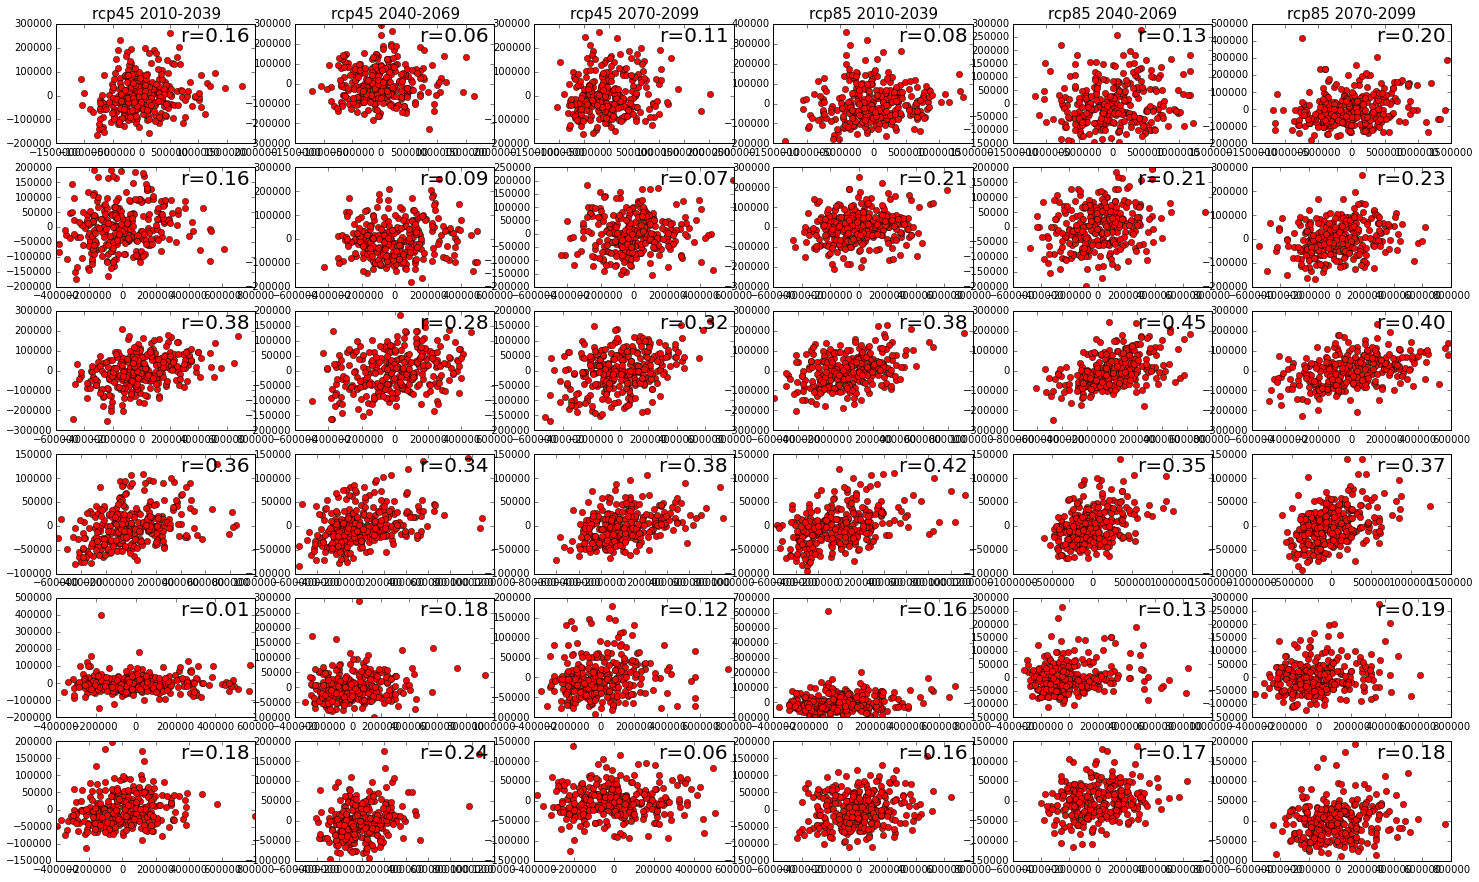

In [28]:
lt = 25
rt = 15
lw = 2.0
fig = plt.figure(figsize=(lt,rt))

scenarios = ["rcp45","rcp45","rcp45","rcp85","rcp85","rcp85"]
timechunk = ["2010-2039","2040-2069","2070-2099","2010-2039","2040-2069","2070-2099"]
varnames = ["ts1","ts2","ts3","ts1","ts2","ts3"]

mod_count = 0
fig_count = 0

for basin in basins: 
    count = 0
    for scenario in scenarios:
        model_count = 0
        pearsons = np.ndarray(shape=(1,10),dtype=float)
        for model in models:
            direc = '/raid9/gergel/agg_snowpack/sm_summer/'
            file = '%s_%s_%s.npz' % (basin,model,scenario)
            data = np.load(os.path.join(direc,file))
            sm = data[varnames[count]]

            direc = '/raid9/gergel/agg_snowpack/climatology/arrays/'
            file = 'pr_%s_%s_%s_mam.npz' % (basin,model,scenario)
            data = np.load(os.path.join(direc,file))
            p = data[varnames[count]]

            ax = fig.add_subplot(6,6,fig_count+1)
            ax.plot(p-np.mean(p),sm-np.mean(sm),'ro')
            pearsons[0,model_count] = pearsonr(p-np.mean(p),sm-np.mean(sm))[0]
            
            model_count += 1
        
        fig_text = 'r=%.2f' %(np.mean(pearsons))
        if fig_count < 6:
            title_text = '%s %s' %(scenario,timechunk[count])
            ax.set_title(title_text,size=15)
        ax.text(0.80, 0.9,fig_text, ha='center', va='center', transform=ax.transAxes,size=20)
        
        count += 1
        fig_count += 1
    


'''plt.xlabel('Precipitation  (averaged over region) [mm]')
plt.ylabel('Variance in Simulated Soil Moisture Projections between GCMs (at grid cell level) [mm]')
plt.title('Coastal South, RCP 4.5 2010-2039')'''

## save figure
direc = '/raid9/gergel/agg_snowpack/plots/summer_sm'
plotname = 'sm_precip_spatialaverage_correlation.png' 
savepath = os.path.join(direc, plotname)
print ("saving figure to '%s'" % savepath)
plt.savefig(savepath)

CORRELATION BETWEEN SPRING PRECIPITATION AND SUMMER SOIL MOISTURE (AVERAGED OVER 30-YR CLIMATOLOGY) 

FROM TOP TO BOTTOM: MISSOURI, NW INTERIOR, COASTAL NORTH, COASTAL SOUTH, LOWER COLORADO, GREAT BASIN

saving figure to '/raid9/gergel/agg_snowpack/plots/summer_sm/sm_precip_temporalaverage_correlation.png'


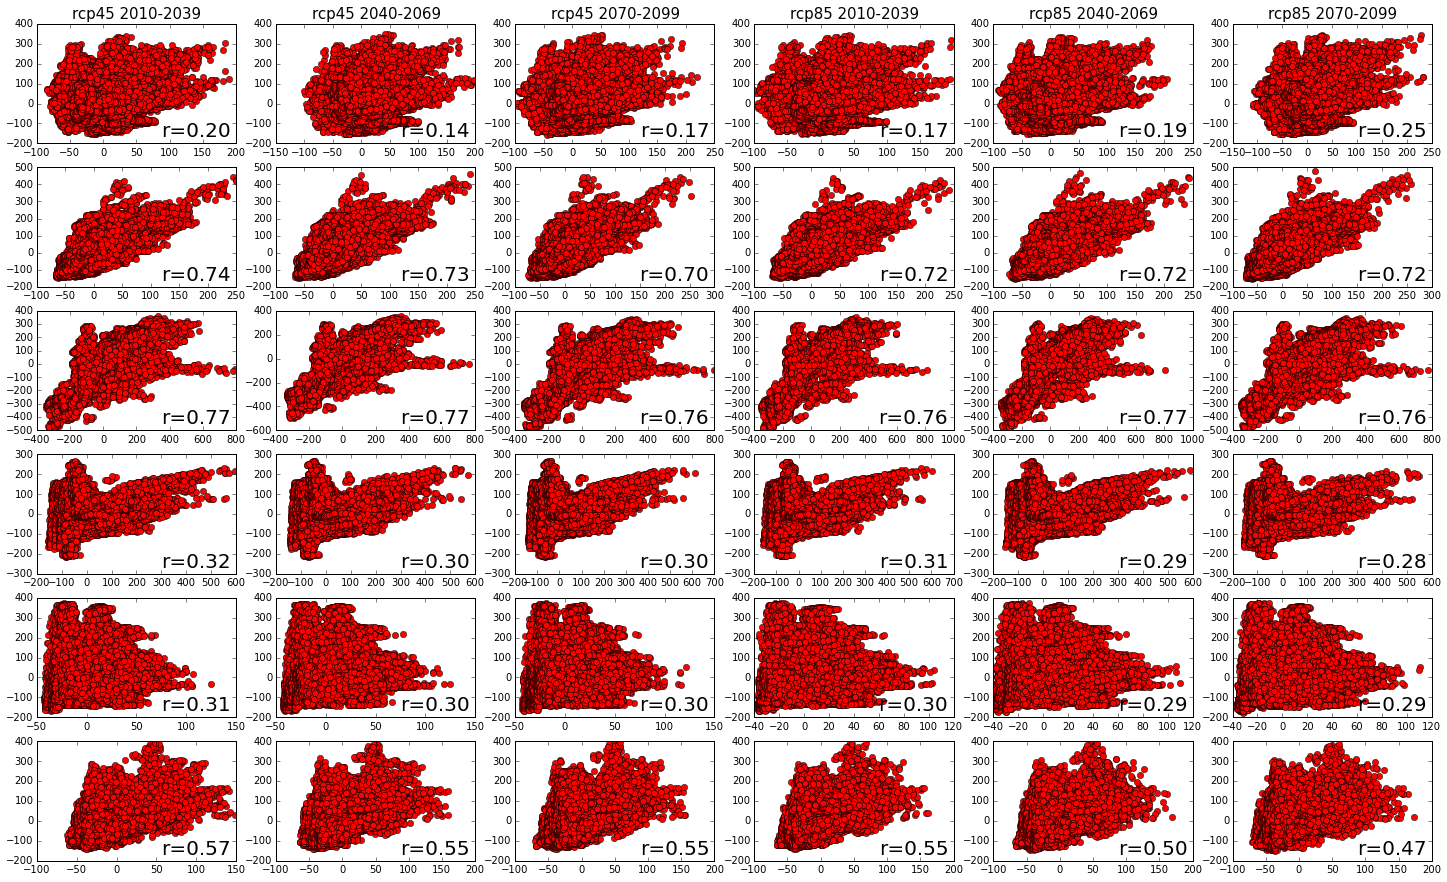

In [30]:
lt = 25
rt = 15
lw = 2.0
fig = plt.figure(figsize=(lt,rt))

scenarios = ["rcp45","rcp45","rcp45","rcp85","rcp85","rcp85"]
timechunk = ["2010-2039","2040-2069","2070-2099","2010-2039","2040-2069","2070-2099"]
varnames = ["chunk1","chunk2","chunk3","chunk1","chunk2","chunk3"]

mod_count = 0
fig_count = 0

for basin in basins: 
    count = 0
    for scenario in scenarios:
        model_count = 0
        pearsons = np.ndarray(shape=(1,10),dtype=float)
        for model in models:
            direc = '/raid9/gergel/agg_snowpack/sm_summer/'
            file = '%s_%s_%s.npz' % (basin,model,scenario)
            data = np.load(os.path.join(direc,file))
            sm = data[varnames[count]]

            direc = '/raid9/gergel/agg_snowpack/climatology/arrays/'
            file = 'pr_%s_%s_%s_mam.npz' % (basin,model,scenario)
            data = np.load(os.path.join(direc,file))
            p = data[varnames[count]]

            ax = fig.add_subplot(6,6,fig_count+1)
            ax.plot(p-np.mean(p),sm-np.mean(sm),'ro')
            pearsons[0,model_count] = pearsonr(p-np.mean(p),sm-np.mean(sm))[0]
            
            model_count += 1
        
        fig_text = 'r=%.2f' %(np.mean(pearsons))
        if fig_count < 6:
            title_text = '%s %s' %(scenario,timechunk[count])
            ax.set_title(title_text,size=15)
        ax.text(0.80, 0.1,fig_text, ha='center', va='center', transform=ax.transAxes,size=20)
        
        count += 1
        fig_count += 1
    


'''plt.xlabel('Precipitation  (averaged over region) [mm]')
plt.ylabel('Variance in Simulated Soil Moisture Projections between GCMs (at grid cell level) [mm]')
plt.title('Coastal South, RCP 4.5 2010-2039')'''

## save figure
direc = '/raid9/gergel/agg_snowpack/plots/summer_sm'
plotname = 'sm_precip_temporalaverage_correlation.png' 
savepath = os.path.join(direc, plotname)
print ("saving figure to '%s'" % savepath)
plt.savefig(savepath)